#                                          1. EXTRAINDO DADOS DO TWITTER    

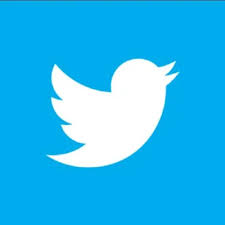

link documentação
#tweepy: https://www.tweepy.org/
#link para credênciais: https://developer.twitter.com/en/docs/authentication/oauth-1-0a/obtaining-user-access-tokens


In [43]:
#importando as bibliotecas necessárias
#caso não possua a biblioteca 'tweepy' instalada, basta digitar o comando: 
#!pip install tweepy

import tweepy as tw
import pandas as pd
import time
import sqlite3

In [45]:
#dados fornecidos no site do twitter na área develope da sua API.
#https://developer.twitter.com/en

consumer_key = 
consumer_secret = 
bearer_token = 
access_token = 
acess_token_secret = 

In [46]:
#criando conexão com o twitter

cliente = tw.Client(bearer_token, consumer_key, consumer_secret, access_token, acess_token_secret)

In [47]:
#determinando um horario especifico para a leitura dos twitters
start = '2023-05-17T00:00:00Z'
end = '2023-05-17T00:10:00Z'

resposta = cliente.search_recent_tweets(query = "covid OR coronavirus OR pandemia OR vacina", 
                                        tweet_fields=['author_id', 'created_at', 'lang'],
                                        max_results=100,
                                        start_time=start, 
                                        end_time=end)

In [27]:
#visualizabdo os dados baixados 
#dessa forma visualizamos tudo o que é baixado: dados, metadados...

resposta

Response(data=[<Tweet id=1656813936841203713 text='RT @luis_gj: Vi a mis colegas morir por falta de insumos médicos y equipo de protección mientras Gatell decía que México estaba preparado p…'>, <Tweet id=1656813936715649024 text='RT @CarlitoS_lim: No solo el Dr. Muerte Hugo López-Gatell debe ser condenado por negligencia en la pandemia,  también su jefe ANSLO‼️👇🏻 htt…'>, <Tweet id=1656813935306178562 text='RT @lcrive: Mentiroso, o Brasil ainda tem alguns índices bons, graças ao integro e competente governo Bolsonaro, reconhecido como um dos qu…'>, <Tweet id=1656813934987362305 text='@HassNassar Una pandemia mal manejada, todo se hizo al reves. No compraron a tiempo la Sputnik V. Y lo mas grave para el pais, destrozaron los acuerdos de paz.'>, <Tweet id=1656813931875246081 text='RT @MeetJess: Adults who have obstructive sleep apnea have up to an 75% increased risk, on average, of developing long Covid after a SARS-C…'>, <Tweet id=1656813931434737665 text='RT @filipe_rafaeli: OS DADOS L

In [48]:
#visualizando somente os dados baixados

dados = resposta.data

In [29]:
dados

[<Tweet id=1656813936841203713 text='RT @luis_gj: Vi a mis colegas morir por falta de insumos médicos y equipo de protección mientras Gatell decía que México estaba preparado p…'>,
 <Tweet id=1656813936715649024 text='RT @CarlitoS_lim: No solo el Dr. Muerte Hugo López-Gatell debe ser condenado por negligencia en la pandemia,  también su jefe ANSLO‼️👇🏻 htt…'>,
 <Tweet id=1656813935306178562 text='RT @lcrive: Mentiroso, o Brasil ainda tem alguns índices bons, graças ao integro e competente governo Bolsonaro, reconhecido como um dos qu…'>,
 <Tweet id=1656813934987362305 text='@HassNassar Una pandemia mal manejada, todo se hizo al reves. No compraron a tiempo la Sputnik V. Y lo mas grave para el pais, destrozaron los acuerdos de paz.'>,
 <Tweet id=1656813931875246081 text='RT @MeetJess: Adults who have obstructive sleep apnea have up to an 75% increased risk, on average, of developing long Covid after a SARS-C…'>,
 <Tweet id=1656813931434737665 text='RT @filipe_rafaeli: OS DADOS LOUCOS DO 

In [49]:
#incluindo os dados baixados em um dataframe do pandas

df = pd.DataFrame(dados, columns = ['author_id', 'created_at', 'lang', 'text'])

In [31]:
#visualizando as primeiras linhas de comando do nosso dataframe
df

,author_id,created_at,lang,text
0,457102723,2023-05-12 00:09:59+00:00,es,RT @luis_gj: Vi a mis colegas morir por falta de insumos médicos y equipo de protección mientras Gatell decía que Mé...
1,1280971384986824704,2023-05-12 00:09:59+00:00,es,"RT @CarlitoS_lim: No solo el Dr. Muerte Hugo López-Gatell debe ser condenado por negligencia en la pandemia, tambié..."
2,1147660449669951488,2023-05-12 00:09:58+00:00,pt,"RT @lcrive: Mentiroso, o Brasil ainda tem alguns índices bons, graças ao integro e competente governo Bolsonaro, rec..."
3,735908006,2023-05-12 00:09:58+00:00,es,"@HassNassar Una pandemia mal manejada, todo se hizo al reves. No compraron a tiempo la Sputnik V. Y lo mas grave par..."
4,1605274196833083406,2023-05-12 00:09:58+00:00,en,"RT @MeetJess: Adults who have obstructive sleep apnea have up to an 75% increased risk, on average, of developing lo..."
...,...,...,...,...
94,1416841321084563462,2023-05-12 00:09:42+00:00,en,"RT @MbGaUSA: The COVID vaccines have an estimated death rate &gt;1,000 higher than the acceptable safe limit, by @st..."
95,1465420642166009857,2023-05-12 00:09:42+00:00,en,"@jewstein3000 Even if someone is able to recover they will never be the same, even people who recover from cancer st..."
96,2267598355,2023-05-12 00:09:42+00:00,en,"RT @a_newsman: Everyone branded a “conspiracy theorist” during covid who was eventually proven right, still somehow ..."
97,423312428,2023-05-12 00:09:42+00:00,en,Australian government hit with class action lawsuit over Covid vaccine https://t.co/o50L6lkNQ9 via @MailOnline


In [50]:
#filtrando o dataframe por Tweet me Português
df_filtrado=df.query("lang == 'pt'")

In [33]:
#verificando o resultado
df_filtrado

,author_id,created_at,lang,text
2,1147660449669951488,2023-05-12 00:09:58+00:00,pt,"RT @lcrive: Mentiroso, o Brasil ainda tem alguns índices bons, graças ao integro e competente governo Bolsonaro, rec..."
5,913531987528384512,2023-05-12 00:09:58+00:00,pt,RT @filipe_rafaeli: OS DADOS LOUCOS DO ESTUDO DA PFIZER\n\nVou contar para vocês uns fatos que pouca gente sabe. Est...
19,978808450191953920,2023-05-12 00:09:55+00:00,pt,"achei q fosse o unico 💀💀 literalmente o twist tenebroso que essa pandemia causou na minha vida, irreparável, sinto c..."
35,129587285,2023-05-12 00:09:53+00:00,pt,@MongeHan Tive primeira crise de ansiedade da vida aos 28 por causa do isolamento na pandemia
47,703028920250142720,2023-05-12 00:09:51+00:00,pt,@vivianeterrah_ pois fez certíssimo! e fiquei louca e ainda descobri que tava com covid no dia seguinte kkk um caos
51,855826438422921216,2023-05-12 00:09:51+00:00,pt,RT @dioonitter: é inevitável falar pandemia e não pensar nessa música. \nhttps://t.co/OfSy8kFeyI
63,996572982943379457,2023-05-12 00:09:49+00:00,pt,RT @YourLocalSatan: Pandemia simplesmente engoliu minha adolescência e agora os 20 tão batendo na minha porta e meu ...
66,1605302229317177344,2023-05-12 00:09:48+00:00,pt,RT @Amaro_Coronel: Quanto tempo a globo falou das imagens colocadas em sigilo pelo GSI e que quando reveladas mostra...
74,1450091370,2023-05-12 00:09:47+00:00,pt,"RT @Laurinha_2050: ❤️❗️ Japão: *Declaração Chocante.* do Nobel e Professor Japonês de Fisiologia e Medicina, Tasuku ..."
81,1647638004146511872,2023-05-12 00:09:46+00:00,pt,@EttorresMario @capitaodeferro3 @JornalOGlobo Graças ao GOVERNO FEDERAL o Brasil foi um dos únicos países da América...


In [51]:
#aumentado a largura da coluna
pd.set_option('max_colwidth', 150)
df_filtrado.head(30)

,author_id,created_at,lang,text
9,1650273117460111360,2023-05-17 00:09:55+00:00,pt,RT @ATROMBETA3: Leia na íntegra depoimento de Bolsonaro à PF sobre carteira de vacina https://t.co/1VpBrdK80g
13,1553986107443920896,2023-05-17 00:09:55+00:00,pt,"@80sIsBack @EAlcofra @TNTSportsBR Até agora estamos esprando vcs botarem ele atrás das grades. Tentaram de tudo, até com cartão de vacina. Kkkkkkk..."
17,629657695,2023-05-17 00:09:54+00:00,pt,eu na sala vendo jogo e a alaska apagada .. tadinha tomou vacina hoje ta caidinha
31,1429417756869513217,2023-05-17 00:09:49+00:00,pt,RT @brasil247: Presidente do PL joga para Cid responsabilidade em fraude no cartão de vacina de Bolsonaro\nhttps://t.co/bEl4kXoz64
34,1509983717011435529,2023-05-17 00:09:48+00:00,pt,RT @GugaNoblat: Acabou o depoimento. Bolsonaro não sabe do cartão de vacina falsificado e nem pediu que fizessem isso para ele. Dê like se…
45,1469571471387340801,2023-05-17 00:09:46+00:00,pt,RT @amigosdosonso: 💉 Todinho vacinada com a primeira dose da vacina de prevenção contra cinomose e outras doenças. 🙏🏻\n\nGratidão a pessoa qu…
51,61465951,2023-05-17 00:09:44+00:00,pt,@dario_CE @SergioEmiRec @kleitsom @rede_marco @LulaOficial Mas isso é o mínimo que deve ser feito. A pouco tempo ele disse que o Covid matou mais ...
53,38018822,2023-05-17 00:09:44+00:00,pt,"RT @SigaGazetaBR: Em depoimento à PF, Bolsonaro diz que não determinou inserção de dados de vacinação contra a Covid-19 no sistema do Minis…"
65,34777046,2023-05-17 00:09:40+00:00,pt,@JoelmaMarcia A pandemia deu uma contribuição grande para colocar esses meninos e meninas nas telas
68,1337623253158940672,2023-05-17 00:09:39+00:00,pt,"RT @alcrsk: esse é o MELHOR tweet dessa rede social.\n\nsem muito debate, ele tem essa forma agressiva em meio a um protesto na época.\n\nGENIA…"


In [52]:
#salvando os dados do data frame em csv
df_filtrado.to_csv('file1.csv',mode='a', sep=",")

In [22]:
#Fim!